# installing packages

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy

# Data Loading

In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn import preprocessing
path = r'data.csv'
df = pd.read_csv(path) 

# Understanding Data

## Basic Data Analysis

In [128]:
# check dimensions
print(f'Dimensions of Data: {df.shape}')
# checking datatypes of each label
print(f'dTypes of Data: \n\n{df.dtypes}')

Dimensions of Data: (9357, 15)
dTypes of Data: 

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object


## replacing -200 with k-Nearest Neighbour 

In [129]:
df_unchopped = df.copy()
df = df.drop(['Date', 'Time'], axis=1)
df.replace(-200, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=5)  # Adjust neighbors based on dataset size
df.iloc[:, :] = imputer.fit_transform(df)

## Statistical Analysis

### Generic Details

In [130]:
pd.options.display.precision = 2
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00,9357.00
mean,2.09,1100.40,229.71,10.14,941.54,233.97,832.95,108.92,1457.35,1026.10,18.38,49.18,1.03
std,1.42,214.68,147.28,7.43,265.72,205.67,253.97,47.09,341.95,394.95,8.73,17.10,0.40
min,0.10,647.00,7.00,0.10,383.00,2.00,322.00,2.00,551.00,221.00,-1.90,9.20,0.18
25%,1.00,939.00,130.40,4.50,738.00,90.00,658.00,73.00,1235.00,738.00,12.00,36.20,0.75
50%,1.74,1066.00,175.60,8.30,913.00,168.00,803.00,104.00,1461.00,971.00,17.80,49.50,1.00
75%,2.78,1229.00,323.20,14.00,1117.00,307.00,965.00,136.00,1674.00,1274.00,24.40,62.10,1.30
max,11.90,2040.00,1189.00,63.70,2214.00,1479.00,2683.00,340.00,2775.00,2523.00,44.60,88.70,2.23


### Correlation

In [131]:
correlations = df.corr(method='pearson')
correlations

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.00,0.88,0.77,0.93,0.91,0.81,-0.71,0.71,0.63,0.86,0.04,0.02,0.04
PT08.S1(CO),0.88,1.00,0.76,0.88,0.89,0.72,-0.77,0.66,0.69,0.90,0.05,0.11,0.13
NMHC(GT),0.77,0.76,1.00,0.78,0.76,0.69,-0.67,0.62,0.44,0.75,-0.07,0.05,-0.02
C6H6(GT),0.93,0.88,0.78,1.00,0.98,0.73,-0.74,0.64,0.77,0.87,0.20,-0.07,0.17
PT08.S2(NMHC),0.91,0.89,0.76,0.98,1.00,0.72,-0.80,0.67,0.78,0.88,0.25,-0.10,0.19
NOx(GT),0.81,0.72,0.69,0.73,0.72,1.00,-0.66,0.77,0.28,0.79,-0.22,0.17,-0.14
PT08.S3(NOx),-0.71,-0.77,-0.67,-0.74,-0.80,-0.66,1.00,-0.65,-0.54,-0.80,-0.15,-0.05,-0.23
NO2(GT),0.71,0.66,0.62,0.64,0.67,0.77,-0.65,1.00,0.20,0.72,-0.16,-0.12,-0.32
PT08.S4(NO2),0.63,0.69,0.44,0.77,0.78,0.28,-0.54,0.20,1.00,0.59,0.56,-0.04,0.63
PT08.S5(O3),0.86,0.90,0.75,0.87,0.88,0.79,-0.80,0.72,0.59,1.00,-0.02,0.12,0.07


### Skewness

In [132]:
skewness = df.skew()
skewness

CO(GT)           1.43
PT08.S1(CO)      0.75
NMHC(GT)         1.40
C6H6(GT)         1.34
PT08.S2(NMHC)    0.55
NOx(GT)          1.79
PT08.S3(NOx)     1.12
NO2(GT)          0.71
PT08.S4(NO2)     0.20
PT08.S5(O3)      0.62
T                0.30
RH              -0.04
AH               0.25
dtype: float64

## Visualization

### plotting against time

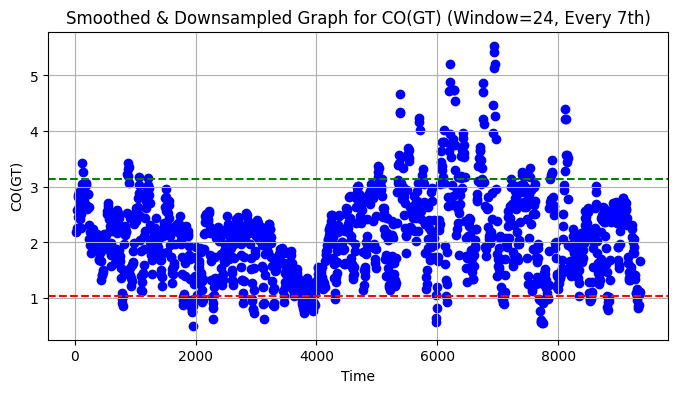

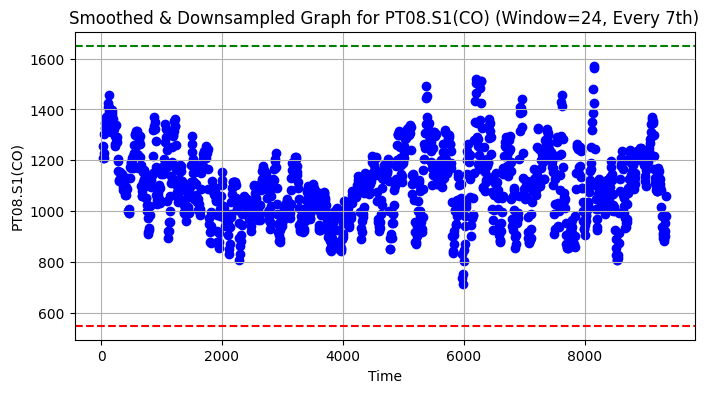

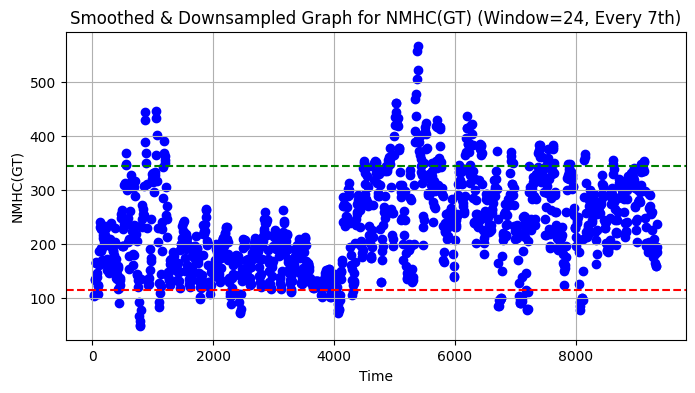

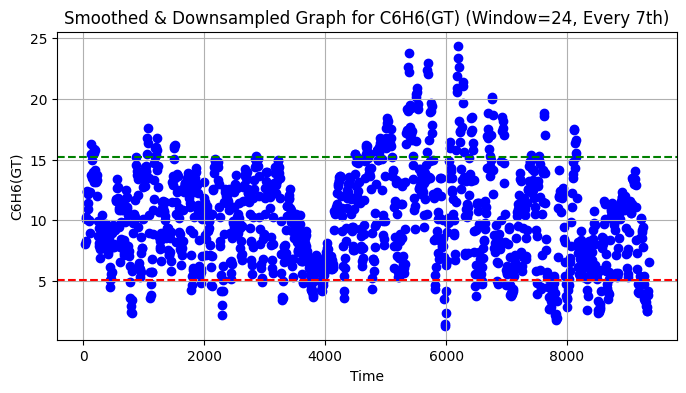

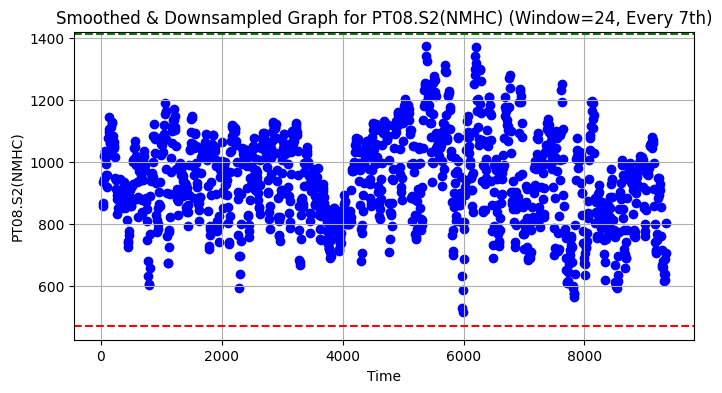

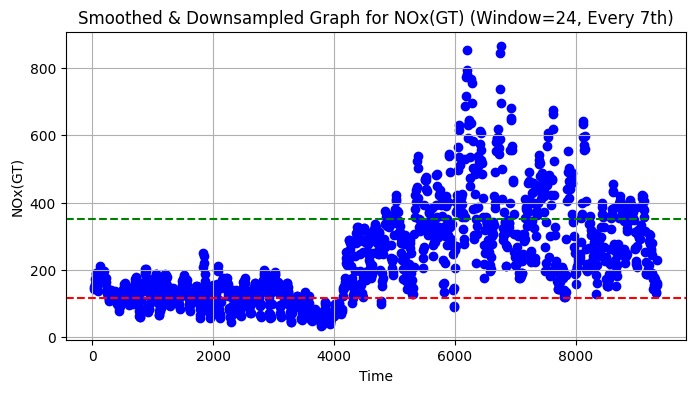

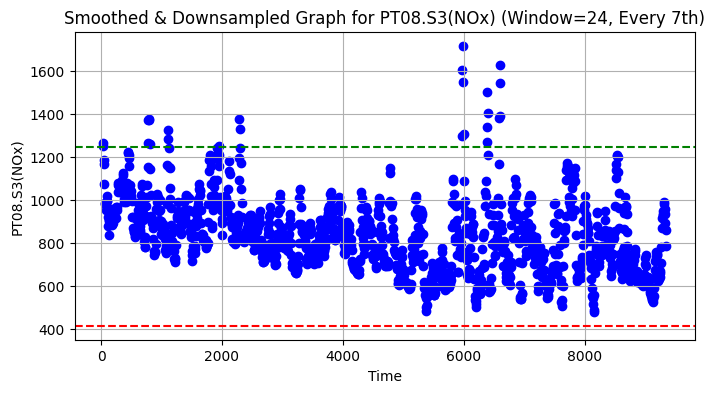

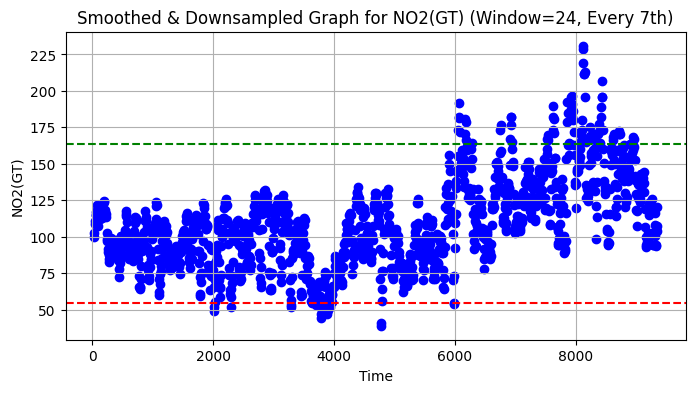

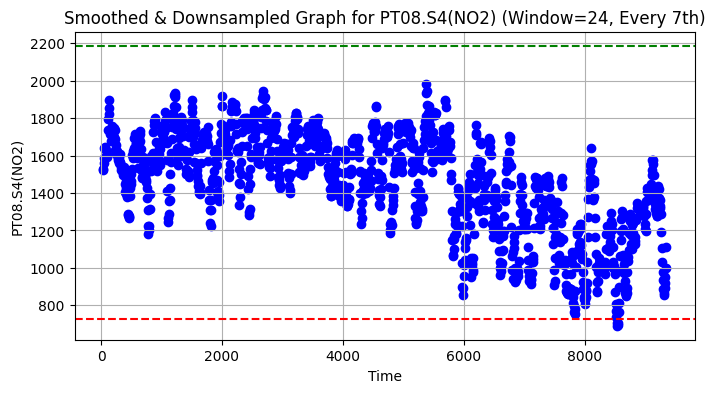

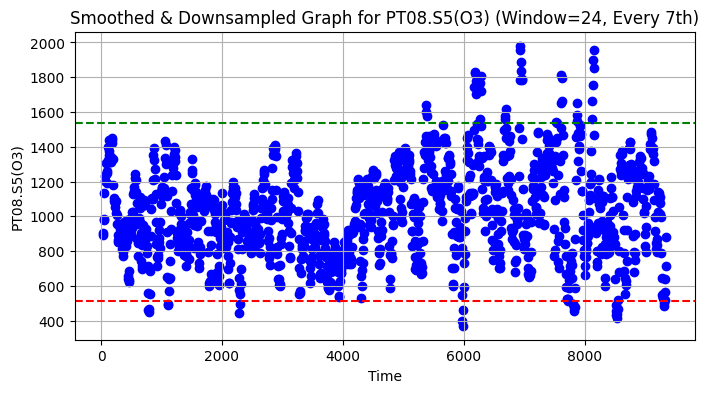

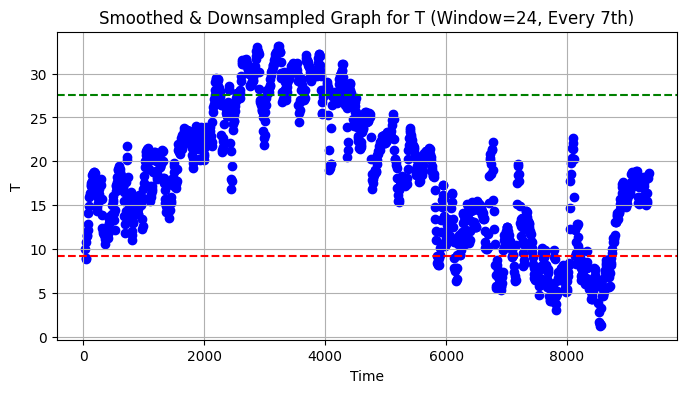

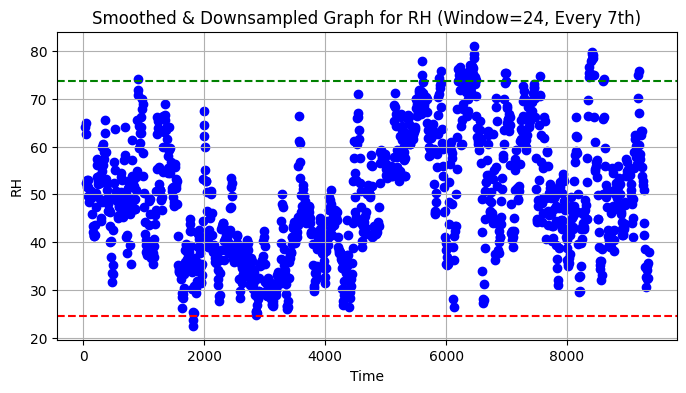

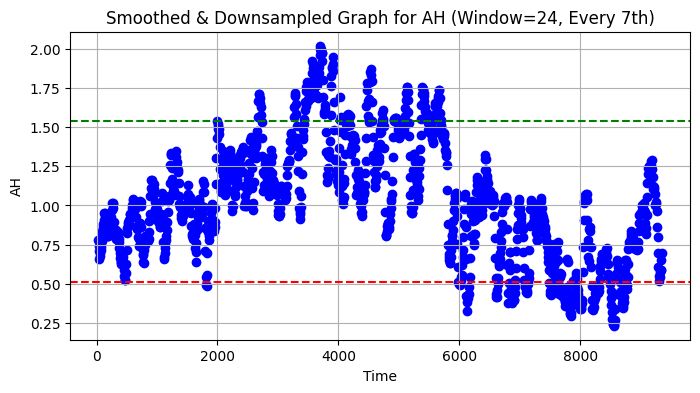

In [133]:
# Apply rolling average
window_size = 24  # Adjust as needed
df_smooth = df.rolling(window=window_size).mean()

# Downsample by plotting every Nth point
N = 7  # Adjust as needed

for column in df_smooth.columns:
    # Add points
    plt.figure(figsize=(8, 4))
    plt.scatter(df.index[::N], df_smooth[column][::N], marker='o',color='b')
    # Calculate mean of the column
    column_mean = df_smooth[column].mean()
    # Add horizontal lines at 1/2 mean and 3/2 mean
    plt.axhline(y=column_mean / 2, color='r', linestyle='--', label=f"1/4 Mean ({column_mean / 4:.2f})")
    plt.axhline(y=(3 * column_mean) / 2, color='g', linestyle='--', label=f"7/4 Mean ({(7 * column_mean) / 4:.2f})")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.title(f"Smoothed & Downsampled Graph for {column} (Window={window_size}, Every {N}th)")
    plt.grid(True)
    plt.show()

### Histograms

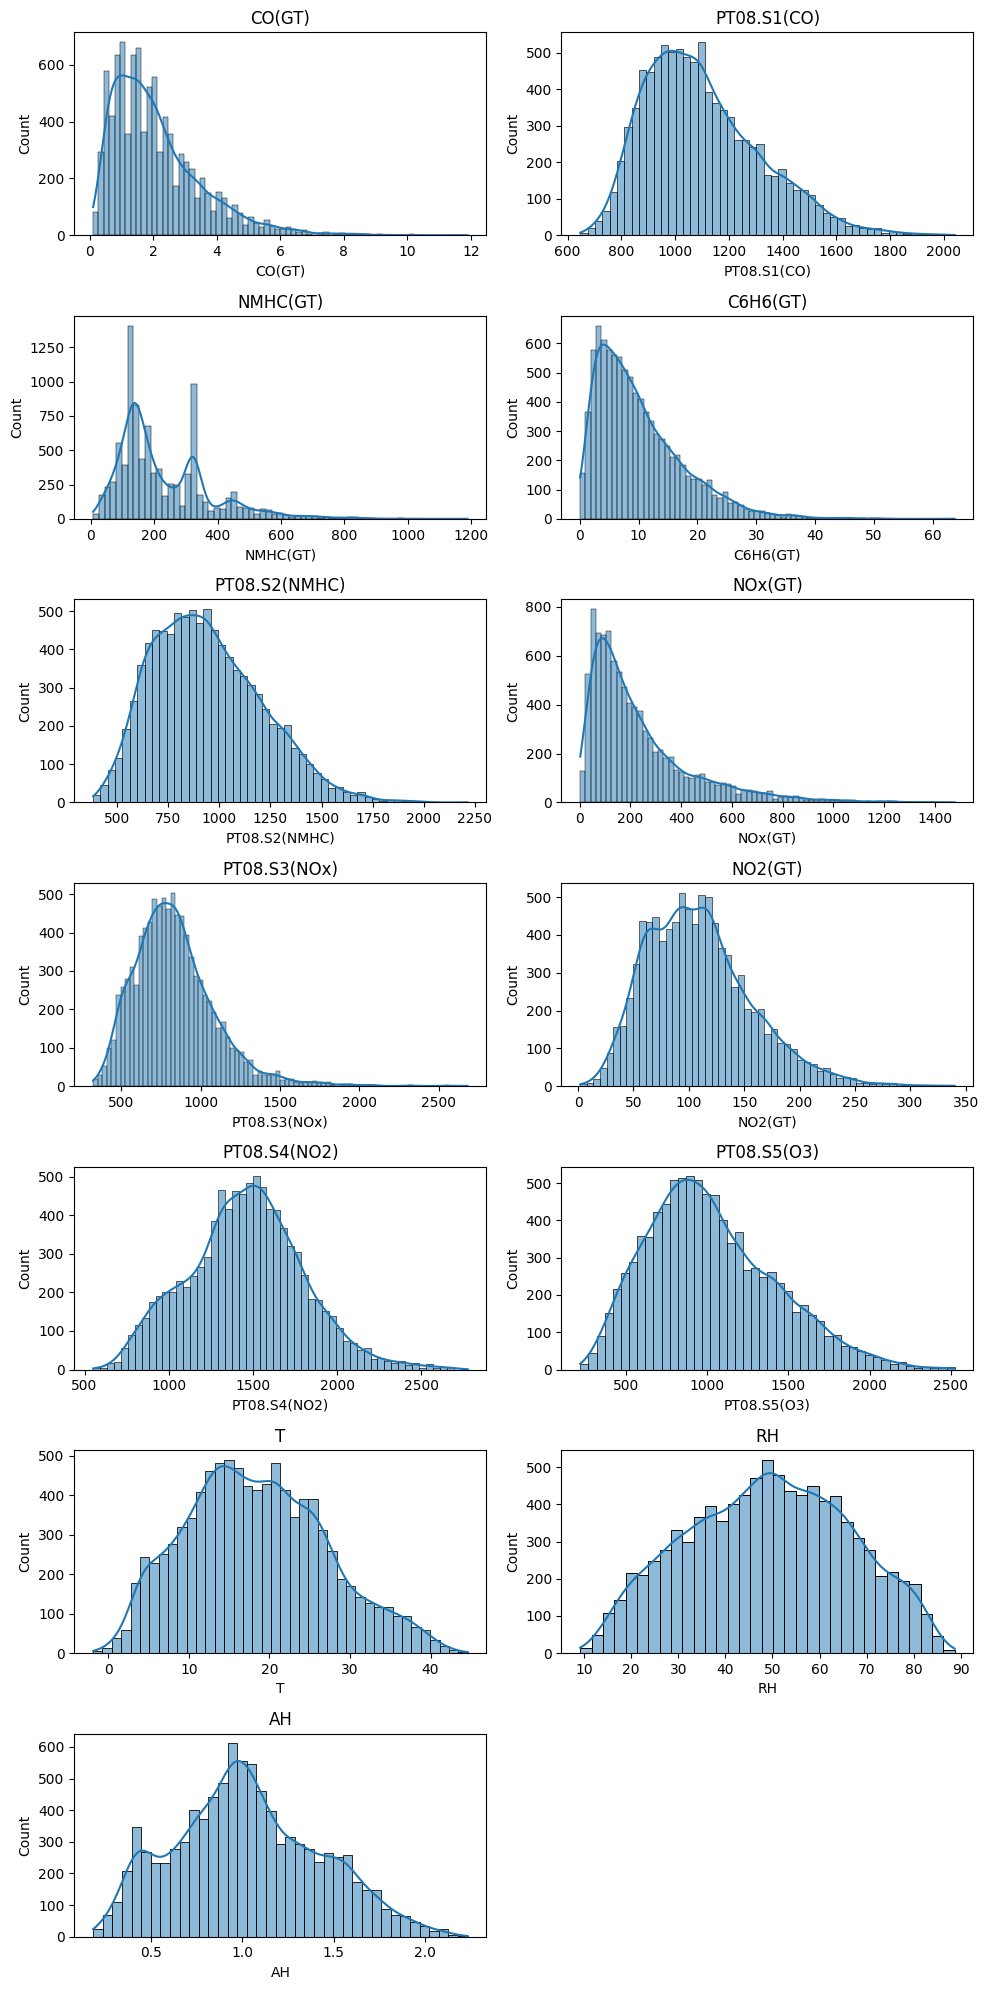

In [134]:
num_columns = df.shape[1]

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Box and Whiskers

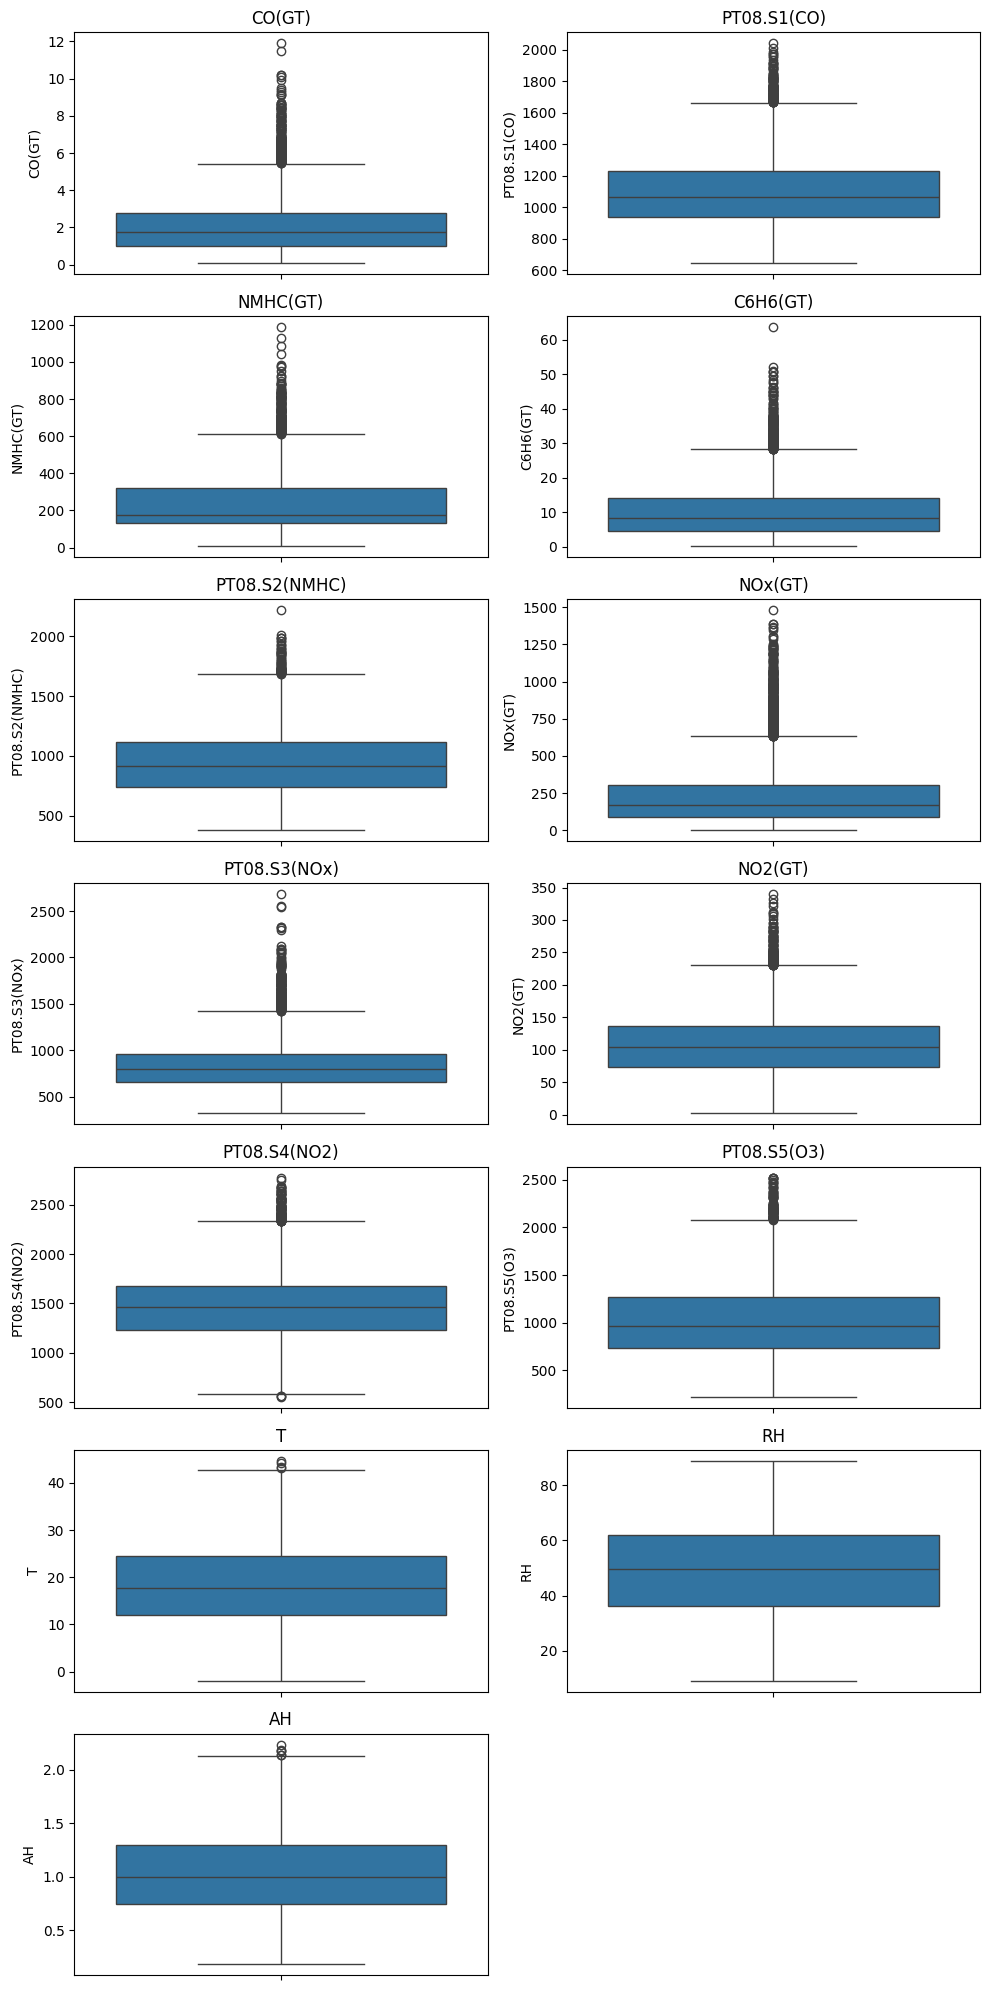

In [135]:
num_columns = df.shape[1]

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(column)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### correlation plots

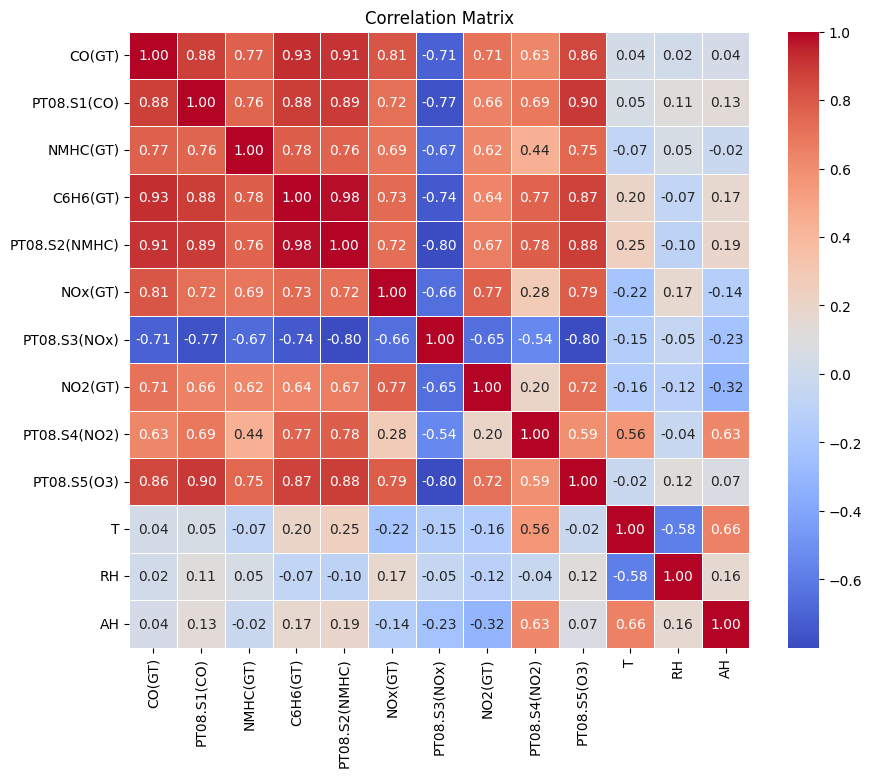

In [136]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Visualization Summary

- some labels are highly correlated
- Data has many outliers
- Some labels have skewed values

# Outlier Handelling

We need to apply diffrent oulier for different labels<br>
We will apply <b>Z-score</b> for skewed data<br>
and <b>IQR</b> for rest

In [137]:
# get a list of labels of highly skewed
threshold = 1
# Get labels with skewness higher than the threshold
skewed_columns = skewness[abs(skewness) > threshold]
normal_columns = skewness[abs(skewness) <= threshold]
print("Highly skewed columns:")
print(skewed_columns)
print()
print("Normal columns:")
print(normal_columns)

Highly skewed columns:
CO(GT)          1.43
NMHC(GT)        1.40
C6H6(GT)        1.34
NOx(GT)         1.79
PT08.S3(NOx)    1.12
dtype: float64

Normal columns:
PT08.S1(CO)      0.75
PT08.S2(NMHC)    0.55
NO2(GT)          0.71
PT08.S4(NO2)     0.20
PT08.S5(O3)      0.62
T                0.30
RH              -0.04
AH               0.25
dtype: float64


## IQR for skewed data

In [138]:
for label in skewed_columns.index.tolist():
    Q1 = df[label].quantile(0.25)
    Q3 = df[label].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[label] >= lower_bound) & (df[label] <= upper_bound)]


## Z-score for non-skewed data

In [139]:
for label in normal_columns.index.tolist():
    z_scores = stats.zscore(df[label])
    df = df[abs(z_scores) < 3]

# Feature Scaling

We will scale data using min-max scaler to rescale data between 0 to 1

In [140]:
array = df.values
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_rescaled = data_scaler.fit_transform(array)
df_rescaled = pd.DataFrame(data_rescaled)
df_rescaled.columns = df.columns
df_rescaled.index = df.index
df = df_rescaled
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00
mean,0.32,0.43,0.31,0.32,0.45,0.32,0.45,0.45,0.47,0.42,0.45,0.49,0.42
std,0.18,0.18,0.18,0.21,0.21,0.22,0.19,0.18,0.18,0.19,0.19,0.22,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.19,0.15,0.29,0.15,0.31,0.32,0.36,0.28,0.31,0.32,0.28
50%,0.28,0.41,0.26,0.28,0.44,0.26,0.43,0.44,0.49,0.41,0.44,0.49,0.41
75%,0.43,0.55,0.45,0.45,0.59,0.44,0.57,0.56,0.60,0.55,0.58,0.66,0.56
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Adding Labels for Date and Time

In [141]:
df['Datetime'] = pd.to_datetime(df_unchopped['Date']+' '+df_unchopped['Time'])
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df.drop(['Datetime'],axis=1,inplace=True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Day,Hour
0,0.47,0.76,0.22,0.45,0.60,0.29,0.65,0.50,0.63,0.62,0.33,0.50,0.28,3,10,18
1,0.36,0.69,0.16,0.35,0.51,0.18,0.77,0.41,0.55,0.43,0.33,0.48,0.26,3,10,19
2,0.40,0.81,0.12,0.33,0.49,0.23,0.74,0.51,0.55,0.50,0.30,0.56,0.28,3,10,20
3,0.40,0.78,0.11,0.34,0.50,0.30,0.69,0.55,0.57,0.58,0.28,0.64,0.29,3,10,21
4,0.28,0.67,0.06,0.24,0.39,0.23,0.80,0.52,0.51,0.52,0.28,0.63,0.30,3,10,22


In [142]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Day,Hour
count,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00,7984.00
mean,0.32,0.43,0.31,0.32,0.45,0.32,0.45,0.45,0.47,0.42,0.45,0.49,0.42,6.23,15.88,11.38
std,0.18,0.18,0.18,0.21,0.21,0.22,0.19,0.18,0.18,0.19,0.19,0.22,0.20,3.29,8.86,7.04
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
25%,0.17,0.29,0.19,0.15,0.29,0.15,0.31,0.32,0.36,0.28,0.31,0.32,0.28,3.00,8.00,5.00
50%,0.28,0.41,0.26,0.28,0.44,0.26,0.43,0.44,0.49,0.41,0.44,0.49,0.41,6.00,16.00,12.00
75%,0.43,0.55,0.45,0.45,0.59,0.44,0.57,0.56,0.60,0.55,0.58,0.66,0.56,9.00,24.00,17.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,12.00,31.00,23.00
